In [1]:
import mdi.globals as gl
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
import os
import pandas as pd

plt.style.use('default')

In [8]:
data = pd.read_csv(os.path.join(gl.baseDir, gl.behavDir, 'MDI0_merged.csv'))
data = data[(data.BN>1) & (data.correct==1)]
data = data.groupby(['SID', 'Quartet', 'PosInQuartet']).median(numeric_only=True).reset_index()

<Axes: xlabel='PosInQuartet', ylabel='Movement Time'>

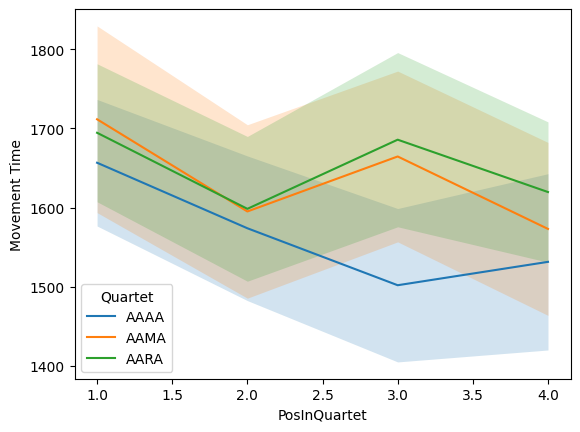

In [9]:
fig, ax = plt.subplots()
sb.lineplot(data=data, ax=ax, x='PosInQuartet', y='Movement Time', hue='Quartet', err_kws={'linewidth': 0}, errorbar='se')